In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('student_success_dataset.csv')

print('Sample Rows: ')
print(df.head())

print('Dataset Shape: ')
print(f'Rows : {df.shape[0]}, Columns: {df.shape[1]}')

print('Dataset Info: ')
print(df.info())

print('Summary Statistics: ')
print(df.describe(include='all'))

print('Missing Values: ')
print(df.isnull().sum())

Sample Rows: 
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          80         60       No           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         50      Yes           5     No
4           7          85         70       No           7    Yes
Dataset Shape: 
Rows : 20, Columns: 6
Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
Summary Statistics: 
        StudyHours  Attendance  PastScore Int

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('student_success_dataset.csv')

print('Missing Values in Each Column: ')
print(df.isnull().sum())

le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])

print('After Encoding: ')
print(df.head())

print('Datatypes: ')
print(df.dtypes)

Missing Values in Each Column: 
StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64
After Encoding: 
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1
Datatypes: 
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int32
SleepHours    int64
Passed        int32
dtype: object


In [4]:
import sys
!{sys.executable} -m pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\smkal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



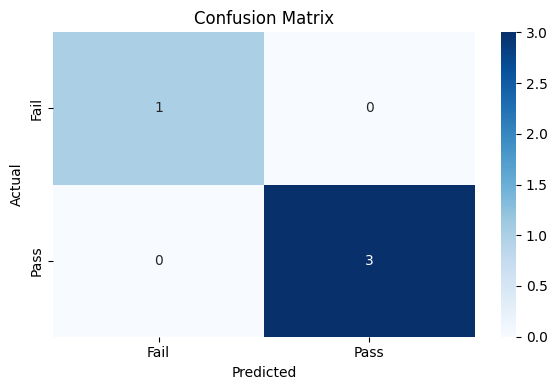

----------Predict Your Result----------
Prediction based on your input: Pass


C:\Users\smkal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student_success_dataset.csv')

le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])

features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y = df_scaled['Passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Classification Report')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print('----------Predict Your Result----------')
try:
    study_hours = float(input("Enter your study hours: "))
    attendance = float(input("Enter your attendance: "))
    past_score = float(input("Enter your past score: "))
    sleep_hours = float(input("Enter your sleep hours: "))

    user_input_df = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendance': attendance,
        'PastScore': past_score,
        'SleepHours': sleep_hours
    }])

    user_input_scaled = scaler.transform(user_input_df)

    prediction = model.predict(user_input_scaled)[0]

    result = 'Pass' if prediction == 1 else 'Fail'
    print(f'Prediction based on your input: {result}')
except Exception as e:
    print('An error occurred', e)